In [ ]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.5 MB/s eta 0:00:00


# Imports and Downloads

In [46]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA for Prediction and Comparison

We will be taking data from Yahoo Finance for analysis.

In [ ]:
start = datetime.date(2018, 1, 1)
end = datetime.date(2019, 6, 1)
data1 = yf.download('AMZN', 
                      start=start, 
                      end=end, 
                      progress=False)
data1["Date"] = data1.index
data1.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000,2018-01-02
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000,2018-01-03
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000,2018-01-04
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000,2018-01-05
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000,2018-01-08


Text(0.5, 1.0, 'AMZN Close 2018-2019')

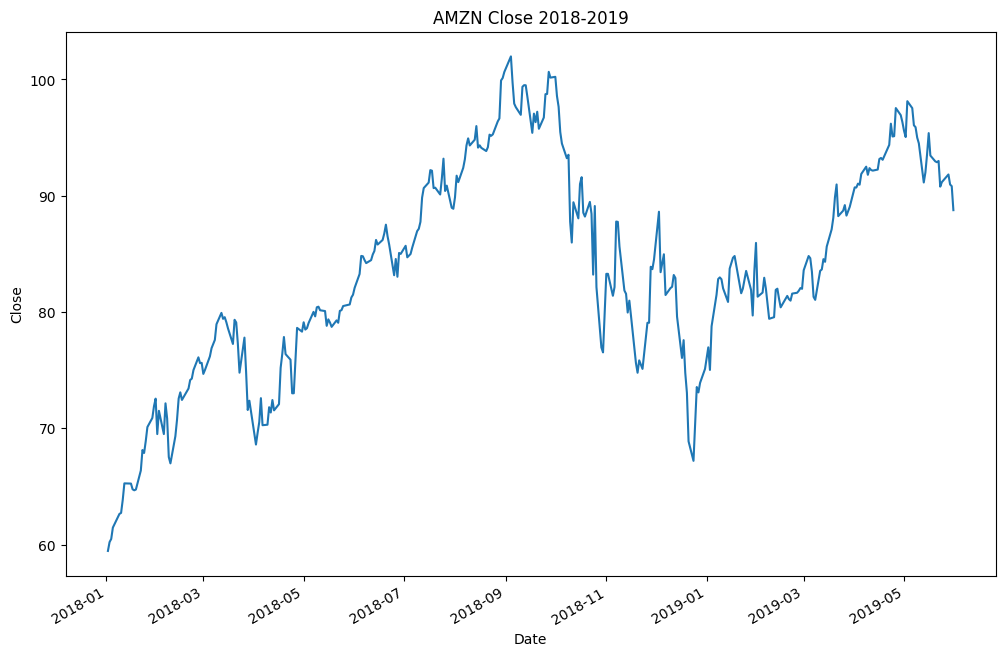

In [ ]:
Close = data1['Close']
Close.head()
Close.plot(figsize=(12,8))
plt.ylabel('Close')
plt.title('AMZN Close 2018-2019')

Using this data, we will try to test a machine learning model, ARIMA, to find predictions and compare them to the real data

In [ ]:
dat1 = Close 

# We will split the data for training(66%) and testing(34%)
size = int(len(dat1) * 0.66)
train, test = dat1[0:size], dat1[size:len(dat1)]

In [ ]:
# initialize the historical and prediction values for future comparison
hist = [x for x in train]
predict = list()

In [ ]:
# train the model and make future forecast as stored in the test data
for t in range(len(test)):
    model = ARIMA(hist, order=(5,1,0))
    model_fit = model.fit()
    pred = model_fit.forecast()
    yhat = pred[0]
    predict.append(yhat)
    # Append test observation into overall record
    obs = test[t]
    hist.append(obs)

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  354
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -692.318
Date:                Tue, 25 Apr 2023   AIC                           1396.637
Time:                        00:59:25   BIC                           1419.836
Sample:                             0   HQIC                          1405.868
                                - 354                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0422      0.042     -1.008      0.314      -0.124       0.040
ar.L2         -0.0537      0.038     -1.427      0.154      -0.127       0.020
ar.L3         -0.0138      0.044     -0.315      0.7

By finding the Root Mean Squared Error, we can determine whether or not the model predicted with confidence.

In [ ]:
rmse = sqrt(mean_squared_error(test, predict))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.664


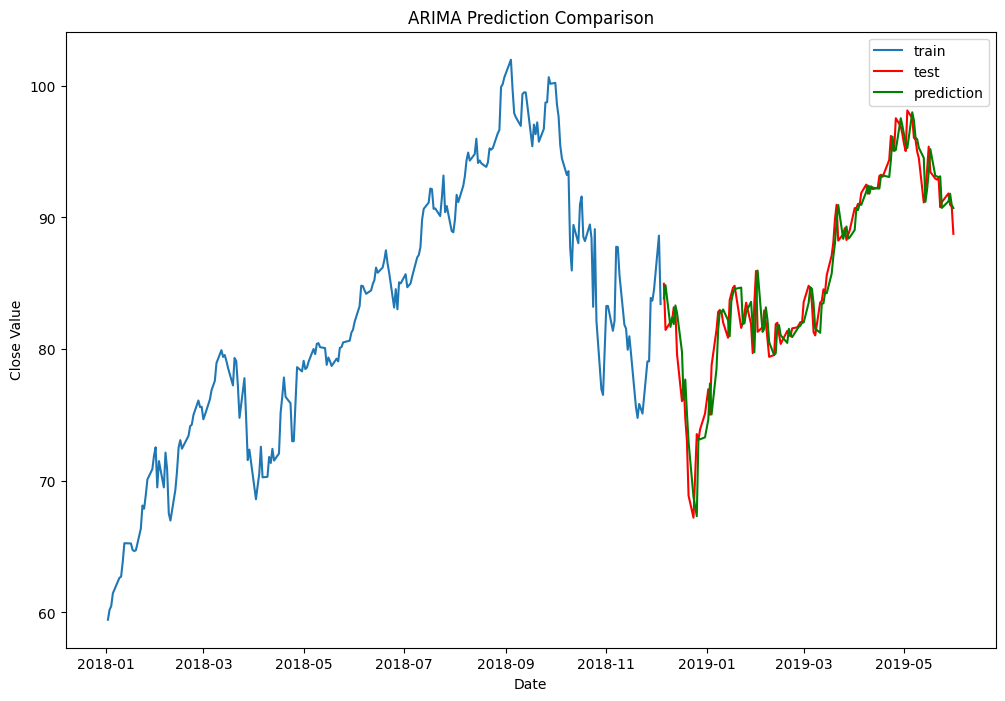

In [ ]:
plt.figure(figsize=(12,8))

pr = pd.DataFrame(predict)
pr = pr.set_index(test.index)

plt.plot(train, label='train')
plt.plot(test, color='red', label='test')
plt.plot(pr, color='green',label='prediction')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('ARIMA Prediction Comparison')
plt.show()

As we can see, ARIMA is good for prediction when the target data is available. It seems particularly good for finding the trend in data, but what about predicting future values?

# ARIMA for Future Prediction

In [ ]:
data = yf.download('AMZN', 
                      start=start, 
                      end=end, 
                      progress=False)
data["Date"] = data.index
#data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
#data.reset_index(drop=True, inplace=True)

data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000,2018-01-02
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000,2018-01-03
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000,2018-01-04
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000,2018-01-05
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000,2018-01-08


In [ ]:
Close1 = data[['Close']]
Close1.head()

,Close
Date,
2018-01-02,59.450500
2018-01-03,60.209999
2018-01-04,60.479500
2018-01-05,61.457001
2018-01-08,62.343498


The p, d, and q values were chosen based on autocorrelation and partial autocorrelation graphs. 

In [55]:
p, d, q = 5, 1, 2

model = ARIMA(Close1, order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/l

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  355
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -690.240
Date:                Tue, 25 Apr 2023   AIC                           1396.479
Time:                        01:36:44   BIC                           1427.434
Sample:                             0   HQIC                          1408.795
                                - 355                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0585      0.042     25.230      0.000       0.976       1.141
ar.L2         -0.9608      0.049    -19.519      0.000      -1.057      -0.864
ar.L3         -0.0011      0.059     -0.018      0.9

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
future = fitted.predict(len(Close1), len(Close1)+10)

#Need to change future's index to match Close1
future = pd.DataFrame(future)
future.index = pd.DatetimeIndex(future.index)
future = future.set_index(pd.date_range("2019-06-01", "2019-06-11"))
print(future)

            predicted_mean
2019-06-01       89.241970
2019-06-02       89.202189
2019-06-03       88.686070
2019-06-04       88.192888
2019-06-05       88.143563
2019-06-06       88.570641
2019-06-07       89.074467
2019-06-08       89.196691
2019-06-09       88.837330
2019-06-10       88.335024
2019-06-11       88.148350


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

<Figure size 1200x800 with 0 Axes>

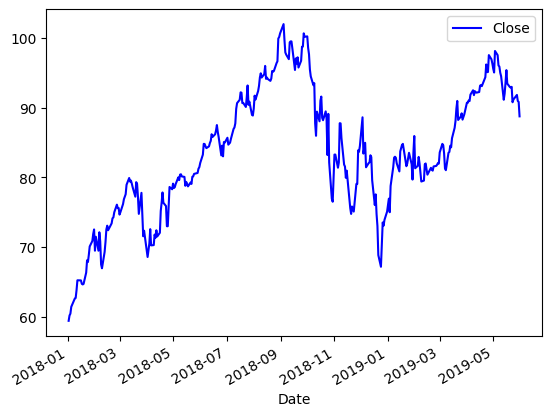

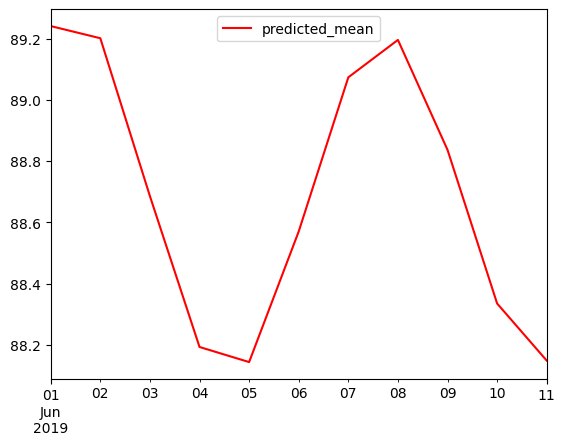

In [57]:
plt.figure(figsize=(12,8))

Close1.plot(color='blue', legend=True, label="Training Data")
future.plot(color='red', legend=True, label="Pred")

As we can see, ARIMA is not so good at predicting far into the future. If we ask for more values farther into the future, the line will 'flatten out' and average around 88.7. We need a better model to account for seasonality as well as a larger set of data.

# SARIMA for Better Future Prediction

In [40]:
new_start = datetime.date(2016, 1, 1)
new_end = datetime.date(2020, 1, 1)

new_data = yf.download('AMZN', 
                      start=new_start, 
                      end=new_end, 
                      progress=False)
new_data["Date"] = new_data.index
new_data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2016-01-04,32.814499,32.886002,31.375500,31.849501,31.849501,186290000,2016-01-04
2016-01-05,32.342999,32.345501,31.382500,31.689501,31.689501,116452000,2016-01-05
2016-01-06,31.100000,31.989500,31.015499,31.632500,31.632500,106584000,2016-01-06
2016-01-07,31.090000,31.500000,30.260500,30.396999,30.396999,141498000,2016-01-07
2016-01-08,30.983000,31.207001,30.299999,30.352501,30.352501,110258000,2016-01-08


In [41]:
new_close = new_data['Close']
#new_close = new_close.resample('M').mean()
new_close.head()

Date
2016-01-04    31.849501
2016-01-05    31.689501
2016-01-06    31.632500
2016-01-07    30.396999
2016-01-08    30.352501
Name: Close, dtype: float64

Text(0.5, 1.0, 'AMZN Close 2016-2019')

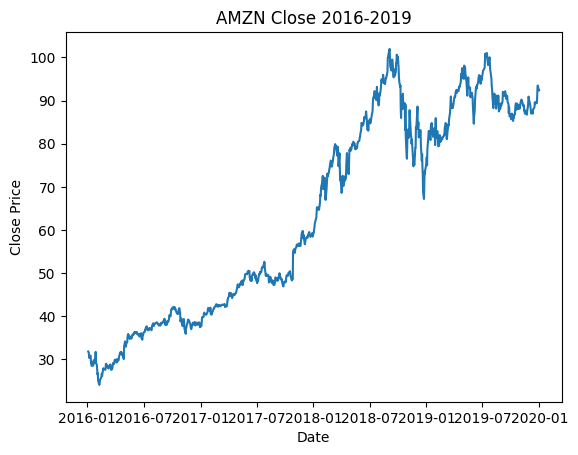

In [42]:
plt.plot(new_close)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AMZN Close 2016-2019')

We can now use a larger set of data upon which the Seasonal ARIMA model can try to predict at least 2 months into the future.

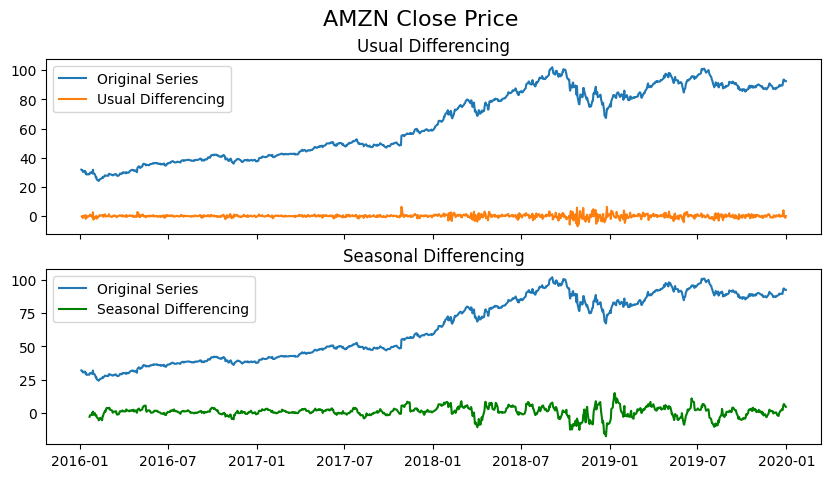

In [44]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(new_close[:], label='Original Series')
axes[0].plot(new_close[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Diff
axes[1].plot(new_close[:], label='Original Series')
axes[1].plot(new_close[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('AMZN Close Price', fontsize=16)
plt.show()

The Differencing graphs serve as proof that a Seasonal ARIMA model would work better than a normal ARIMA. The lower graph attempts to balance out the seasonal trend it finds.

In [45]:
smodel = pm.auto_arima(new_close, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=7,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=4.72 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=5049.075, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=3595.812, Time=1.67 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=4277.069, Time=1.01 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=5066.435, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=3827.487, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=3490.770, Time=2.74 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=5.61 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=3.54 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=5029.640, Time=1.44 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=3491.556, Time=3.06 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=3491.534, Time=3.15 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=4279.723, Time=3.22 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=3493.592, Time=3.31 sec
 ARIMA(1,0,0)(2,1,0)[7]             : AIC=3491.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1006
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -1740.385
Date:                           Tue, 25 Apr 2023   AIC                           3490.770
Time:                                   01:32:01   BIC                           3515.304
Sample:                                        0   HQIC                          3500.095
                                          - 1006                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0692      0.045      1.537      0.124      -0.019       0.157
ar.L1          0.9142      0.008    110.265      0.000       0.898       0.930
ar.S.L7       -0.6243      0.021    -29.826      0.000      -0.665      -0.583
ar.S.L14      -0.3252      0.018    -17.656      0.000      -0.361      -0.289
sigma2         1.9002      0.043     43.877      0.000       1.815       1.985
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):              1476.25
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               9.70   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
#We will use a new SARIMA model for easier graphing
order = (1,0,0)
s_order = (2,1,0,7)
s_model = SARIMAX(new_close, order=order, seasonal_order=s_order)
s_model_fit = s_model.fit()
print(s_model_fit.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 1006
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -1741.589
Date:                           Tue, 25 Apr 2023   AIC                           3491.178
Time:                                   01:32:17   BIC                           3510.805
Sample:                                        0   HQIC                          3498.638
                                          - 1006                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9189      0.008    113.894      0.000       0.903       0.935
ar.S.L7       -0.6247      0.021    -30.002

In [50]:
#Set new model to a variable for prediction
g = s_model_fit.predict(len(new_close),len(new_close)+59)

#Set index to match with data
guess = pd.DataFrame(g)
guess.index = pd.DatetimeIndex(guess.index)
guess = guess.set_index(pd.date_range(new_close.index[-1], periods =60, freq='D'))
guess.head()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
2019-12-31,91.835021
2020-01-01,91.685509
2020-01-02,91.237619
2020-01-03,92.309577
2020-01-04,92.632284


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


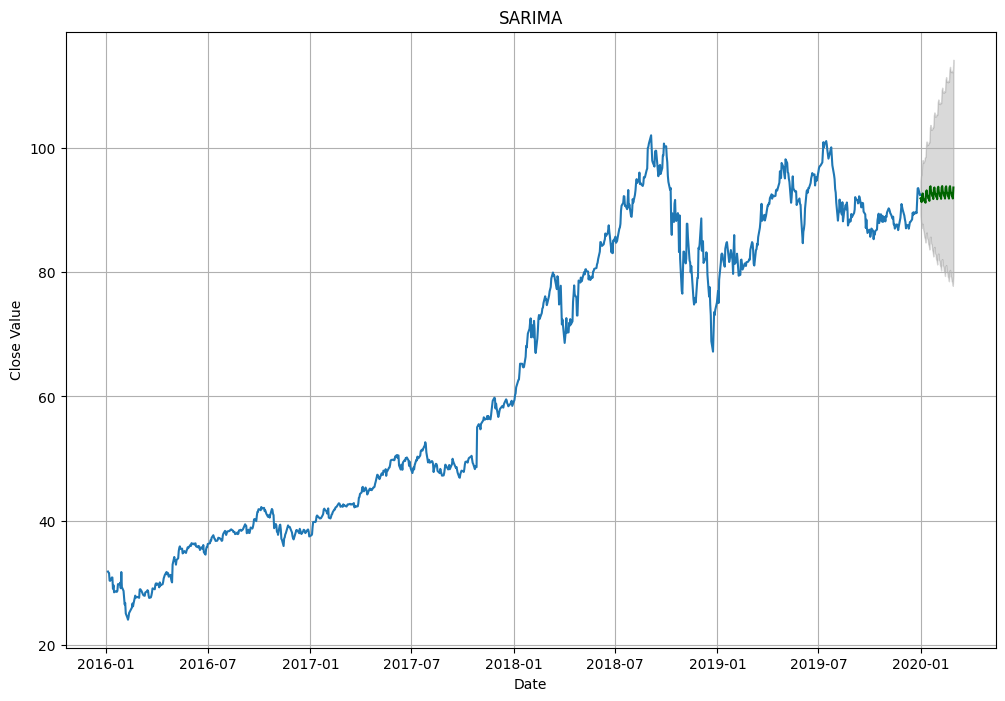

In [60]:
# Forecast
n_periods = 60
fitted, confint = smodel.predict(n_periods, return_conf_int=True)
index_of_fc = pd.date_range(new_close.index[-1], periods = n_periods, freq='D')


# make series for plotting purpose
#fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,8))
plt.plot(new_close)
plt.plot(guess, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title("SARIMA")
plt.grid()
plt.show()

The SARIMA model could potentially be improved to give more accurate answers, however this result is within a valid range for estimation.